# Guinier Approximation

## Partilce Size and Scattering Curve

Using the sphere scattering formula, observe how the particle size affects the scattering curve.

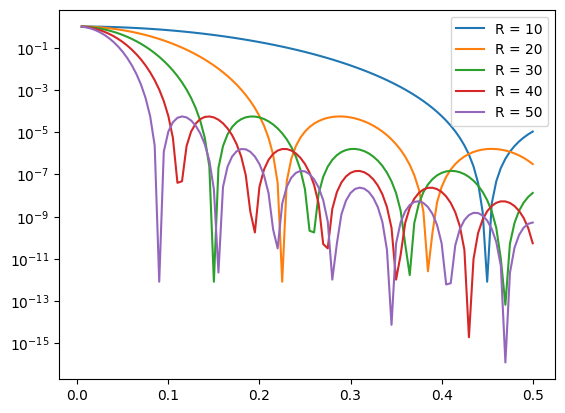

In [3]:
from molass import get_version
assert get_version() >= '0.6.0', 'Please update molass to the latest version'
import numpy as np
import matplotlib.pyplot as plt
from molass.SAXS.Models.Formfactors import homogeneous_sphere

q = np.linspace(0.005, 0.5, 100)
R = 30

I = homogeneous_sphere(q, R)**2
fig, ax = plt.subplots()
ax.set_yscale('log')
for R in [10, 20, 30, 40, 50]:
    I = homogeneous_sphere(q, R)**2
    ax.plot(q, I, label=f'R = {R}')
ax.legend();

We can observe that, in the small-angle region, the larger the particle size, the steeper the slope of the curve.

## Rg ― Radius of Gyration

Consider how the sizes of particles with different shapes can be compared. $R_g$ can be used for that purpose.

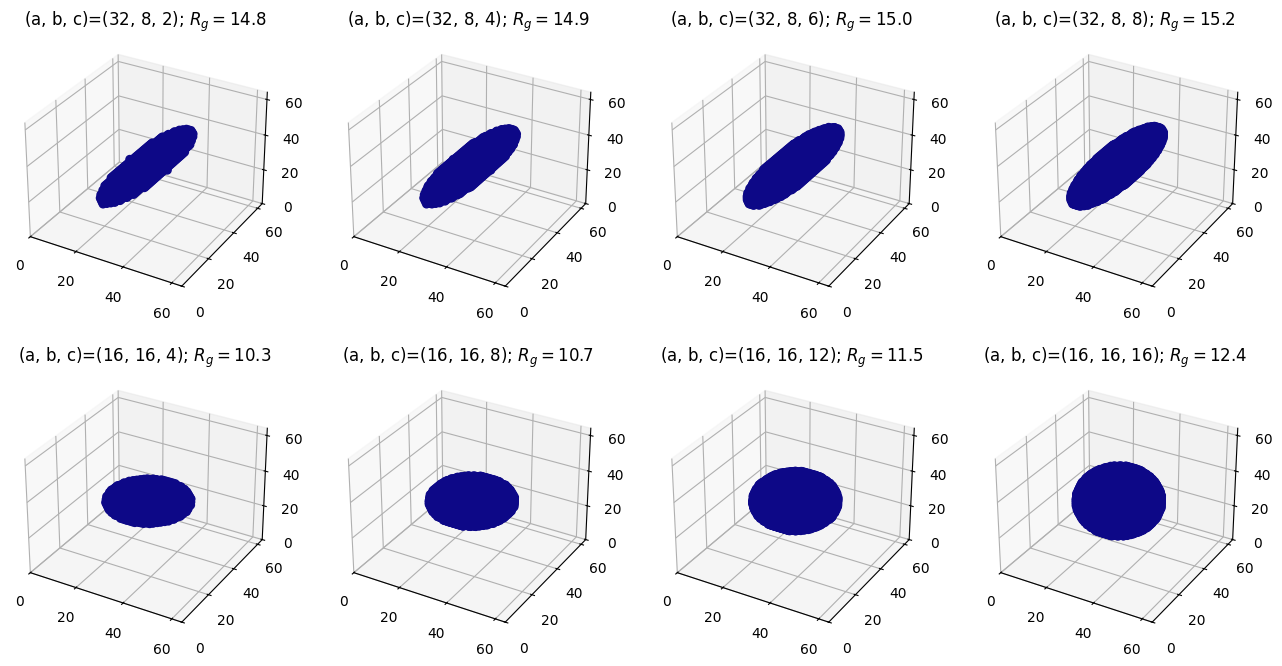

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from molass.Shapes import Ellipsoid
from molass.DensitySpace import VoxelSpace
from molass.SAXS.Simulator import compute_saxs, draw_saxs

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), subplot_kw=dict(projection='3d'))

for i in range(2):
    for j in range(4):
        ax = axes[i, j]
        a = 16 * (2 - i)
        b = 8 * (i + 1)
        c = 2 * ((i + 1)*(j + 1))
        rg = np.sqrt((a**2 + b**2 + c**2)/5)
        ax.set_title(f'(a, b, c)={(a, b, c)}; $R_g={rg:.1f}$')
        ellipsoid = Ellipsoid(a, b, c)
        space = VoxelSpace(64, ellipsoid)
        space.plot_as_dots(ax)

## Guinier Plot



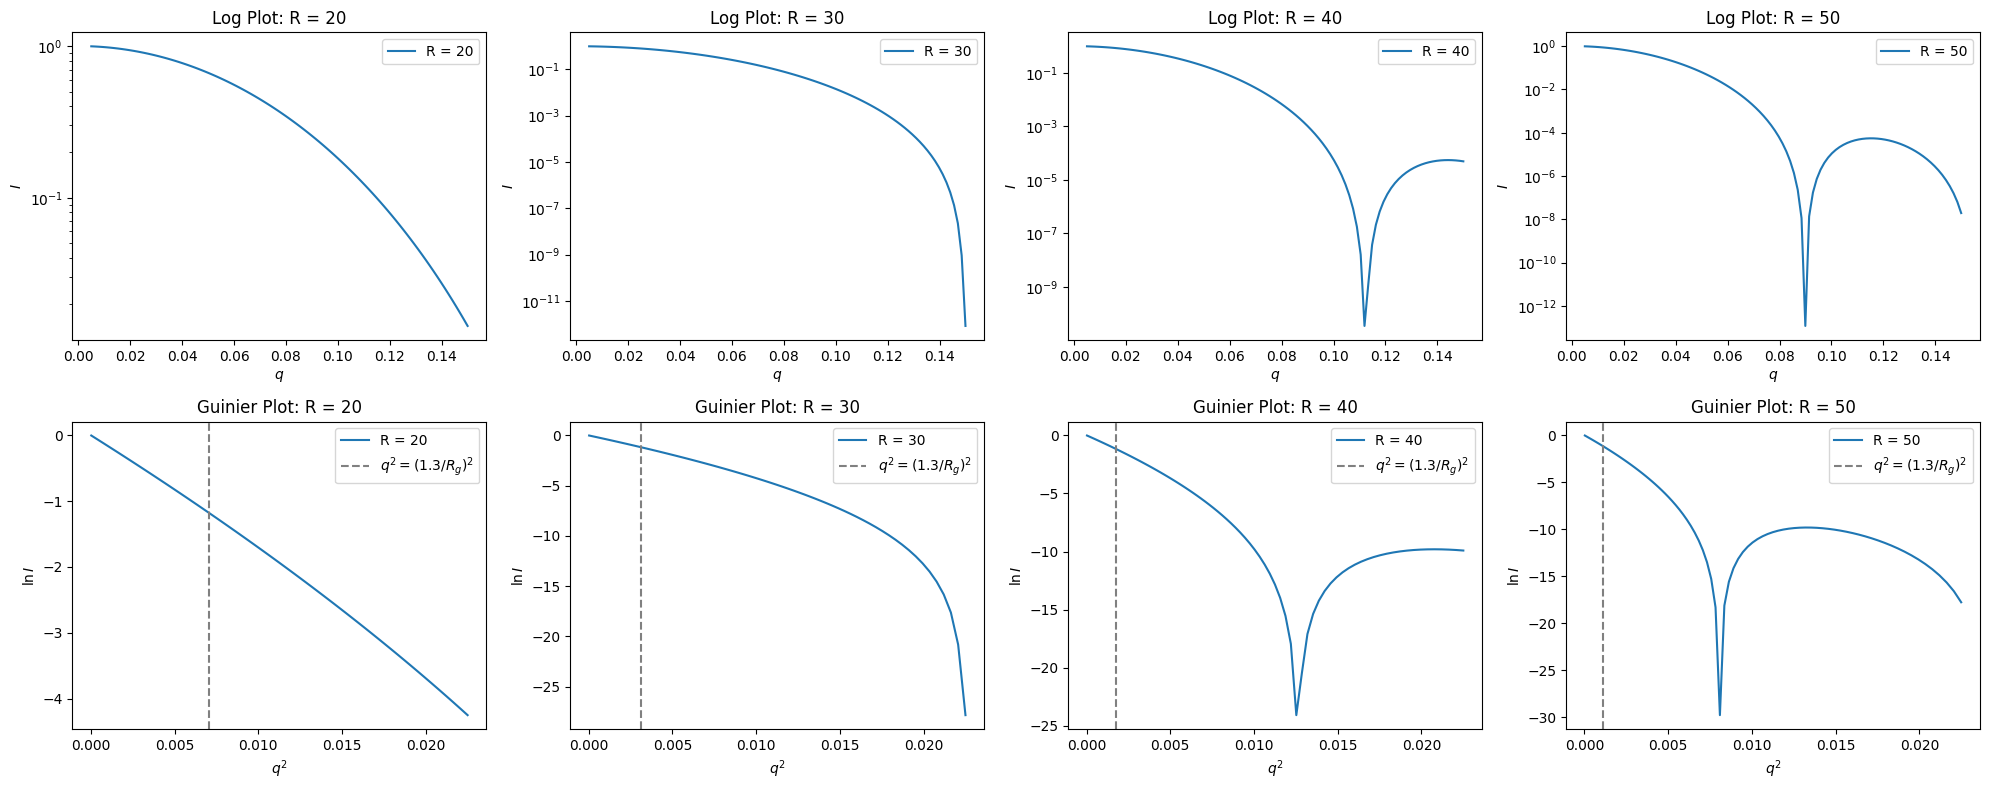

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))

q = np.linspace(0.005, 0.15, 100)

for j, R in enumerate([20, 30, 40, 50]):
    I = homogeneous_sphere(q, R)**2
    ax1, ax2= axes[:,j]
    ax1.set_title(f'Log Plot: R = {R}')
    ax1.set_xlabel(r'$q$') 
    ax1.set_ylabel(r'$I$')
    ax1.plot(q, I, label=f'R = {R}')
    ax1.set_yscale('log')
    ax1.legend()
    ax2.set_title(f'Guinier Plot: R = {R}')
    ax2.plot(q**2, np.log(I), label=f'R = {R}')
    rg = R * np.sqrt(3/5)
    limit = (1.3/rg)**2
    ax2.axvline(limit, color='gray', linestyle='--', label=r'$q^2 = (1.3/R_g)^2$')
    ax2.set_xlabel(r'$q^2$')
    ax2.set_ylabel(r'$\ln I$')
    ax2.legend()

plt.tight_layout()